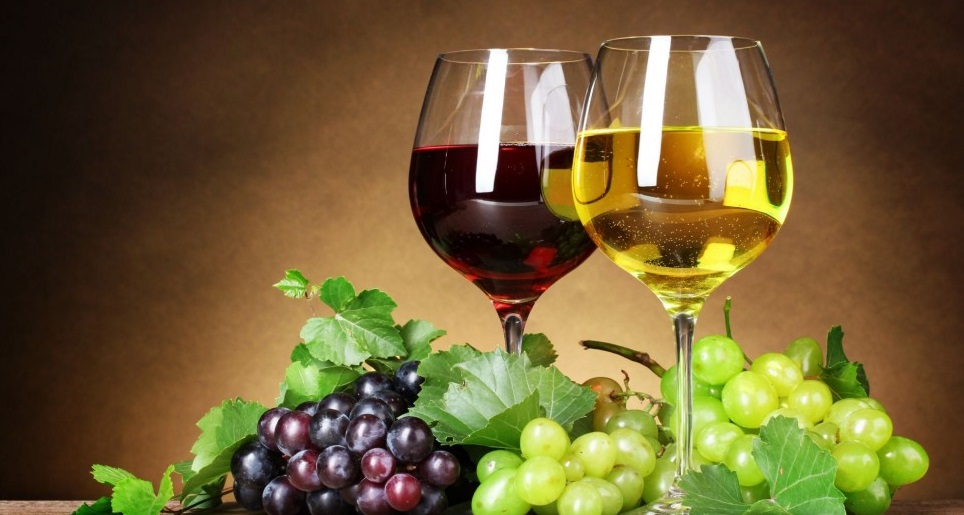

# BUSINESS UNDERSTANDING

In [4]:
# Identificar o tipo de vinho de acordo com as características inerentes de vinho tinto e branco

# DATA UNDERSTANDING

In [9]:
# Base de dados disponibilizada no kaggle para efeito de testes e estudos

[Wine dataset](https://www.kaggle.com/datasets/dell4010/wine-dataset)

# Title

In [1]:
# Aplicando machine learning em base de dados do kaggle

# Head

In [2]:
# estudando machine learning
# by geanclm em 20/02/2022 at 11:47h
# update by geanclm on 24/10/2023

# Local files

In [7]:
!dir

 O volume na unidade C ‚ Windows
 O N£mero de S‚rie do Volume ‚ 9241-82D4

 Pasta de C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning

24/10/2023  09:43    <DIR>          .
24/10/2023  09:36    <DIR>          ..
24/10/2023  09:36                68 .gitattributes
24/10/2023  09:36    <DIR>          .ipynb_checkpoints
24/10/2023  09:36             1.091 LICENSE
24/10/2023  09:43            67.928 ML_vinhos_csv.ipynb
24/10/2023  09:36                50 README.md
24/10/2023  09:36           384.016 wine_dataset.csv
               5 arquivo(s)        453.153 bytes
               3 pasta(s)   885.380.612.096 bytes dispon¡veis


# Import libs

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [22]:
df = pd.read_csv(r'C:\Users\geanc\OneDrive\Documentos\GitHub\machine-learning\wine_dataset.csv')

In [24]:
df.sample(15).T

,3086,2260,5504,1930,3030,2509,2777,1846,2304,243,1054,1593,4414,1834,2144
fixed_acidity,6.7,6.8,6.5,6.8,6.1,6.3,9.8,5.8,8.6,15.0,8.2,6.8,6.6,7.2,6.4
volatile_acidity,0.25,0.25,0.33,0.24,0.22,0.33,0.44,0.2,0.27,0.21,0.64,0.62,0.36,0.23,0.16
citric_acid,0.74,0.34,0.3,0.34,0.49,0.2,0.4,0.27,0.46,0.44,0.27,0.08,0.24,0.38,0.22
residual_sugar,19.4,14.0,3.8,4.6,1.5,5.8,2.8,1.4,6.1,2.2,2.0,1.9,0.9,14.3,1.4
chlorides,0.054,0.032,0.036,0.032,0.051,0.04,0.036,0.031,0.032,0.075,0.095,0.068,0.038,0.058,0.04
free_sulfur_dioxide,44.0,47.0,34.0,37.0,18.0,24.0,35.0,12.0,13.0,10.0,5.0,28.0,15.0,55.0,41.0
total_sulfur_dioxide,169.0,133.0,88.0,135.0,87.0,144.0,167.0,77.0,41.0,24.0,77.0,38.0,72.0,194.0,149.0
density,1.0004,0.9952,0.99028,0.9927,0.9928,0.99425,0.9956,0.9905,0.993,1.00005,0.99747,0.99651,0.99066,0.9979,0.9933
pH,3.51,3.37,3.25,3.2,3.3,3.15,2.97,3.25,2.89,3.07,3.13,3.42,3.23,3.09,3.49
sulphates,0.45,0.5,0.63,0.39,0.46,0.63,0.39,0.36,0.34,0.84,0.62,0.82,0.39,0.44,0.58


In [25]:
df.shape

(6497, 13)

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [28]:
df['style']

0         red
1         red
2         red
3         red
4         red
        ...  
6492    white
6493    white
6494    white
6495    white
6496    white
Name: style, Length: 6497, dtype: object

# DATA PREPARATION

In [30]:
df['style'] = df['style'].replace('red', 0)
df['style'] = df['style'].replace('white', 1)

In [31]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


# DATA VISUALIZATION

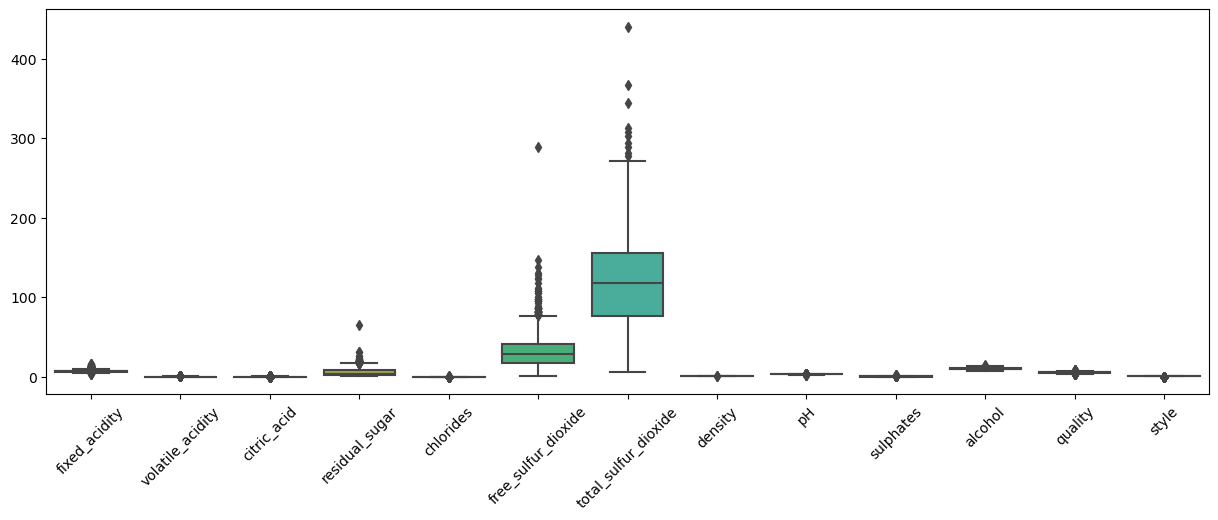

In [72]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data=df)

# Rotacionar a legenda do eixo x em 45 graus
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# imprimir o gráfico
plt.show();

# MODELING

In [45]:
y = df['style']
X = df.drop('style', axis = 1)

In [46]:
y.value_counts()

style
1    4898
0    1599
Name: count, dtype: int64

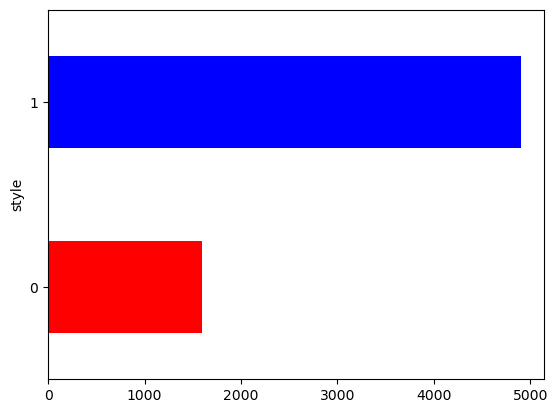

In [47]:
y.value_counts(ascending=True).plot(kind = 'barh', color = ['red','blue']);

In [51]:
y.tail()

6492    1
6493    1
6494    1
6495    1
6496    1
Name: style, dtype: int64

In [49]:
X.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [52]:
X.shape, y.shape

((6497, 12), (6497,))

In [53]:
from sklearn.model_selection import train_test_split as tts

In [54]:
X_tr, X_ts, y_tr, y_ts = tts(X,y, test_size= 0.3)

In [55]:
X_tr.shape, X_ts.shape, y_tr.shape, y_ts.shape

((4547, 12), (1950, 12), (4547,), (1950,))

In [58]:
# aplicando algorítmo de machine learning de classificação
from sklearn.ensemble import ExtraTreesClassifier
modelo = ExtraTreesClassifier()

In [59]:
modelo.fit(X_tr, y_tr)

ExtraTreesClassifier()

# EVALUATION

In [60]:
resultado = modelo.score(X_ts, y_ts)

In [61]:
print("Acurácia:", resultado)

Acurácia: 0.9958974358974358


In [62]:
y_ts[400:403]

4198    1
5072    1
4906    1
Name: style, dtype: int64

In [63]:
X_ts[400:403]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
4198,6.9,0.32,0.27,16.0,0.034,58.0,185.0,0.99938,3.34,0.60,9.0,6
5072,6.5,0.30,0.27,4.0,0.038,37.0,97.0,0.99026,3.20,0.60,12.6,8
4906,9.4,0.24,0.29,8.5,0.037,124.0,208.0,0.99395,2.90,0.38,11.0,3


In [64]:
previsoes = modelo.predict(X_ts[400:403])

In [65]:
print(previsoes)

[1 1 1]


# PERSISTENCE

# DEPLOYMENT